In [2]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# 2. Load dataset (download manually from Kaggle & place in same folder)
df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\coding\sentiment_analysis_project\dataset\amazon_reviews.csv")  # Change to actual filename from Kaggle
print(df.head())

   label                                               text
0      2  Stuning even for the non-gamer: This sound tra...
1      2  The best soundtrack ever to anything.: I'm rea...
2      2  Amazing!: This soundtrack is my favorite music...
3      2  Excellent Soundtrack: I truly like this soundt...
4      2  Remember, Pull Your Jaw Off The Floor After He...


In [4]:
# 3. Keep only text & label columns
df = df[['text', 'label']]  # Change if dataset column names differ
df = df.dropna()

In [5]:
# 4. Preprocessing function
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['cleaned_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# 5. Vectorization

# Step 1: Use only a small sample for now (e.g., 50,000 rows)
df_sample = df.sample(n=50000, random_state=42)  # or use .head(50000)

# Step 2: Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Step 3: Fit on the sample
X = vectorizer.fit_transform(df_sample['cleaned_text'])
y = df_sample['label']


In [7]:
# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 7. Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy: 0.8729
              precision    recall  f1-score   support

           1       0.87      0.87      0.87      4957
           2       0.87      0.87      0.87      5043

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



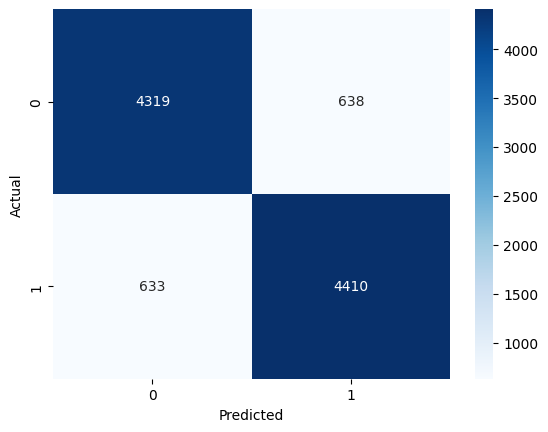

In [9]:
# 8. Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

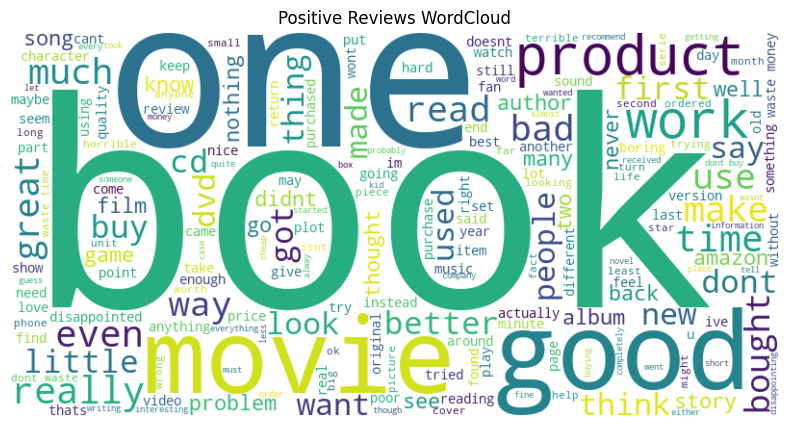

⚠ No data available to generate 'Negative Reviews WordCloud'.


In [12]:

# 9. WordCloud for positive & negative reviews (memory-safe + empty check)

pos_reviews = df[df['label'] == 1]['cleaned_text']
neg_reviews = df[df['label'] == 0]['cleaned_text']

# Ensure we don't sample more than available
positive_text = " ".join(pos_reviews.sample(n=min(5000, len(pos_reviews)), random_state=42))
negative_text = " ".join(neg_reviews.sample(n=min(5000, len(neg_reviews)), random_state=42))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create a word cloud if text exists
def create_wordcloud(text, title):
    if text.strip():  # Check if not empty after stripping spaces
        wc = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10,5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()
    else:
        print(f"⚠ No data available to generate '{title}'.")

# Positive reviews word cloud
create_wordcloud(positive_text, "Positive Reviews WordCloud")

# Negative reviews word cloud
create_wordcloud(negative_text, "Negative Reviews WordCloud")



In [13]:
# 10. Predict on new text
sample_text = ["The product quality is amazing", "Terrible experience, never buying again"]
sample_clean = [clean_text(t) for t in sample_text]
sample_vec = vectorizer.transform(sample_clean)
predictions = model.predict(sample_vec)
print(list(zip(sample_text, predictions)))

[('The product quality is amazing', np.int64(2)), ('Terrible experience, never buying again', np.int64(1))]
